## **Image Enhancement (Spatial - pixel based)**

In [1]:
!pip install --upgrade scikit-image #upgrade to v0.17.x
!git clone https://github.com/zamriibr/cvs_example #clone samples

     |████████████████████████████████| 29.2MB 142kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scikit-image 0.16.2
    Uninstalling scikit-image-0.16.2:
      Successfully uninstalled scikit-image-0.16.2
Cloning into 'cvs_example'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 37 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (37/37), done.


## Linear transformation (example negative image)

In [2]:
from skimage import data

img_cameraman = data.camera()

print('dtype:', img_cameraman.dtype)
print('shape:', img_cameraman.shape)
print("Values min/max:", img_cameraman.min(), img_cameraman.max())

/usr/local/lib/python3.7/dist-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


dtype: uint8
shape: (512, 512)
Values min/max: 0 255


Text(0.5, 1.0, 'Cameraman (negative)')

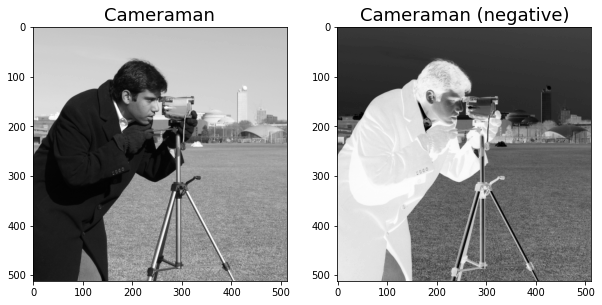

In [3]:
import matplotlib.pyplot as plt

# Apply negetaive linear transformation, as seen in Chapter 2
neg_cameraman = 255 - img_cameraman

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 10))

ax0.imshow(img_cameraman, cmap='gray')
ax0.set_title('Cameraman', fontsize=18)

ax1.imshow(neg_cameraman, cmap='gray')
ax1.set_title('Cameraman (negative)', fontsize=18)


## Histrogram

In [4]:
from skimage import exposure
from skimage import data, img_as_float

img_moon = img_as_float(data.moon())
img_coin = img_as_float(data.coins())


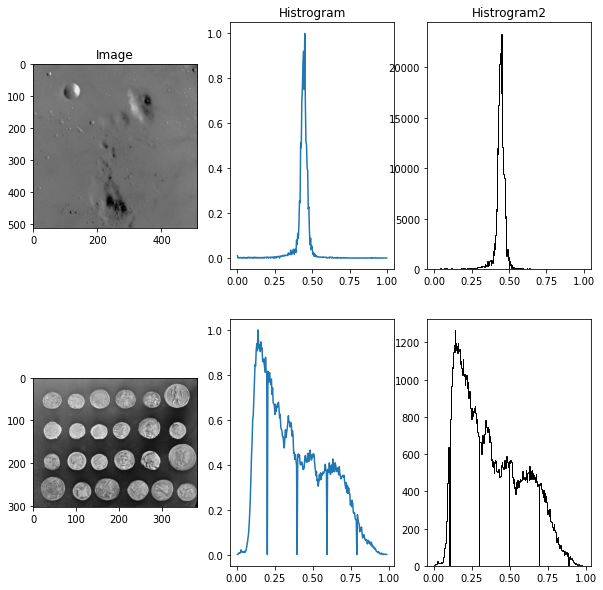

In [5]:
f, axes = plt.subplots(2, 3, figsize=(10, 10))

#Set title
axes[0, 0].set_title('Image')
axes[0, 1].set_title('Histrogram')
axes[0, 2].set_title('Histrogram2')

#Show image
axes[0,0].imshow(img_moon, cmap='gray')
axes[1,0].imshow(img_coin, cmap='gray')

#Calculate and plot histrogram

img_hist0, bins0 = exposure.histogram(img_moon)
img_hist1, bins1 = exposure.histogram(img_coin)

axes[0,1].plot(bins0, img_hist0 / img_hist0.max())
axes[1,1].plot(bins1, img_hist1 / img_hist1.max())

axes[0,2].hist(img_moon.ravel(), bins=bins0, histtype='step', color='black')
axes[1,2].hist(img_coin.ravel(), bins=bins1, histtype='step', color='black')

#Run show
plt.show()

**Question 1: for student 1 (please answer on google form)**

**cmd1**: axes[0,1].plot(bins0, img_hist0 / img_hist0.max())

**cmd2**: axes[0,2].hist(img_cameraman.ravel(), bins=bins, histtype='step', color='black')

1. What is histrogram and important of it ?

2. What is the different between cmd1 and cmd2 ?

## Histrogram equalization

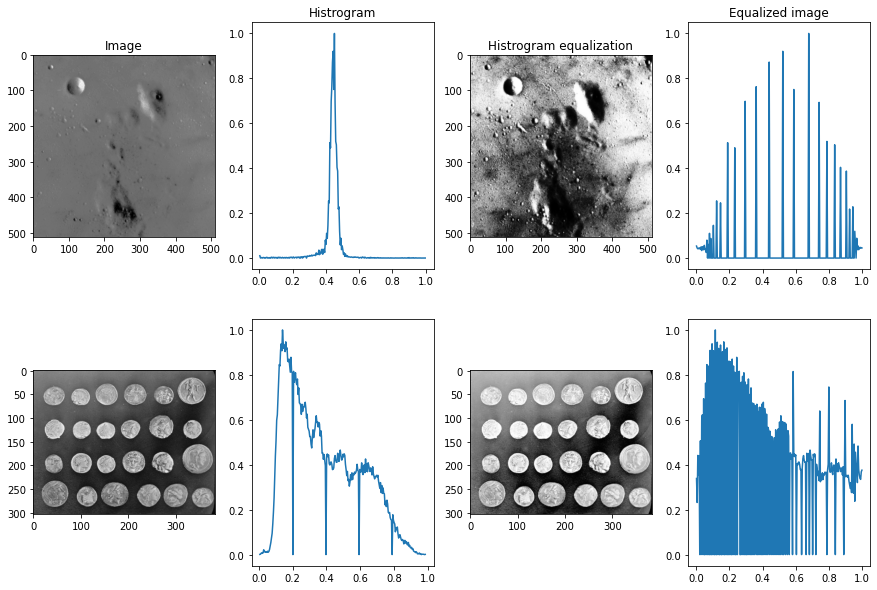

In [6]:
#from skimage import io
#img_coffee = img_as_float(io.imread('/content/coffee.jpg'))

f, axes = plt.subplots(2, 4, figsize=(15, 10))

#Set title
axes[0, 0].set_title('Image')
axes[0, 1].set_title('Histrogram')
axes[0, 2].set_title('Histrogram equalization')
axes[0, 3].set_title('Equalized image')

#Show image
axes[0,0].imshow(img_moon, cmap='gray')
axes[1,0].imshow(img_coin, cmap='gray')

#Calculate and plot histrogram

img_hist0, bins0 = exposure.histogram(img_moon)
img_hist1, bins1 = exposure.histogram(img_coin)

axes[0,1].plot(bins0, img_hist0 / img_hist0.max())
axes[1,1].plot(bins1, img_hist1 / img_hist1.max())

#Apply histrogram
histeq_moon = exposure.equalize_hist(img_moon)
axes[0,2].imshow(histeq_moon, cmap='gray')

histeq_coin = exposure.equalize_hist(img_coin)
axes[1,2].imshow(histeq_coin, cmap='gray')

#Show histrogram distribution for equalize image
eq_img_hist0, eq_bins0 = exposure.histogram(histeq_moon)
axes[0,3].plot(eq_bins0, eq_img_hist0 / eq_img_hist0.max())

eq_img_hist1, eq_bins1 = exposure.histogram(histeq_coin)
axes[1,3].plot(eq_bins1, eq_img_hist1 / eq_img_hist1.max())

#Run show
plt.show()

**Question 2: for student 2 (please answer on google form)**

Please use image (coffee.jpg) from '/content/cvs_example/samples/coffee.jpg'. Create row number 3 and show coffee image before and after histrogram equalization.

1. What is your observation ? please answer in google form.
2. Upload the images to google form (right click, save and upload)


## Average and median filter

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Median filter')

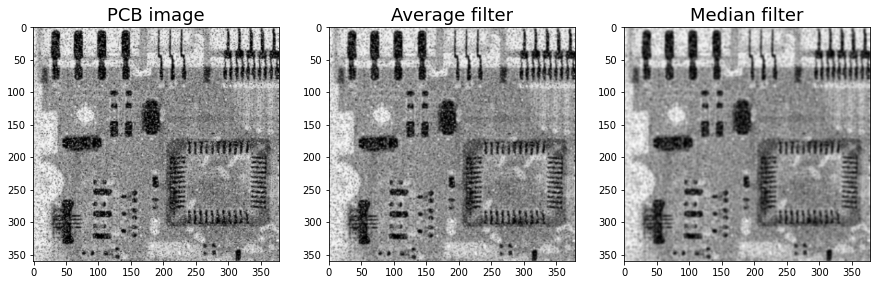

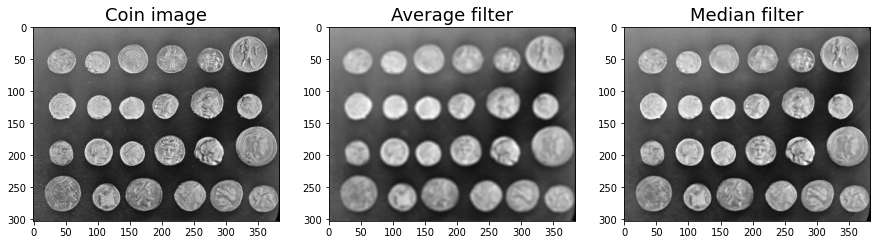

In [58]:
from skimage import io
from skimage.morphology import disk
from skimage.filters.rank import mean, median
from skimage.color import rgb2gray
from scipy import ndimage, misc

from skimage.morphology import (square, rectangle, diamond, disk, cube,
                                octahedron, ball, octagon, star)

img_coin = rgb2gray(img_coin)
avg = mean(img_coin, disk(3)) #adjust 1,2,3...neighbouring function
med = median(img_coin, square(3)) #adjust 1,2,3...

img_pcb = img_as_float(io.imread('/content/cvs_example/samples/pcb.jpg'))  #image from git clone
img_pcb = rgb2gray(img_pcb)

avg1 = mean(img_pcb, square(2)) #adjust 1,2,3...neighbouring function
avg2 = mean(img_pcb, disk(2)) #adjust 1,2,3...neighbouring function
med1 = median(img_pcb, square(2)) #adjust 1,2,3...

f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 15))

ax0.imshow(img_pcb, cmap='gray')
ax0.set_title('PCB image', fontsize=18)

ax1.imshow(avg1, cmap='gray')
ax1.set_title('Average filter', fontsize=18)

ax2.imshow(avg2, cmap='gray')
ax2.set_title('Median filter', fontsize=18)

f, (ax3, ax4, ax5) = plt.subplots(1, 3, figsize=(15, 15))

ax3.imshow(img_coin, cmap='gray')
ax3.set_title('Coin image', fontsize=18)

ax4.imshow(avg, cmap='gray')
ax4.set_title('Average filter', fontsize=18)

ax5.imshow(med, cmap='gray')
ax5.set_title('Median filter', fontsize=18)


**Question 3: for student 3 (please answer on google form)**

Please use image coin (data.coin()). Create row number 2 and show coin image using mean/average and median filter.

1. What is your observation ? please answer in google form.
2. Upload the images to google form (right click, save and upload)
3. Use again PCB image. If you replace disk(3) with square(3), what did you see, much better ? why ? use this link to help you out https://scikit-image.org/docs/stable/auto_examples/numpy_operations/plot_structuring_elements.html



## **Image Enhancement (Frequency based)**

Band-pass filters attenuate signal frequencies outside of a range (band) of interest. In image analysis, they can be used to denoise images while at the same time reducing low-frequency artifacts such a uneven illumination. Band-pass filters can be used to find image features such as blobs and edges.

One method for applying band-pass filters to images is to subtract an image blurred with a Gaussian kernel from a less-blurred image. This example shows two applications of the Difference of Gaussians approach for band-pass filtering.

## Denoise image and reduce shadows (Band pass filter)

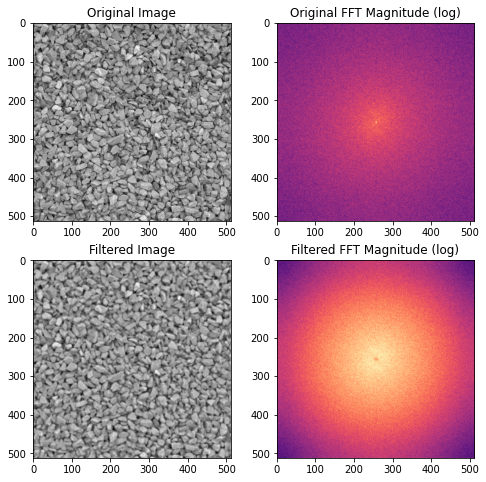

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.data import gravel
from skimage.filters import difference_of_gaussians, window
from scipy.fftpack import fftn, fftshift

image = gravel()

wimage = image * window('hann', image.shape)  # window image to improve FFT
filtered_image = difference_of_gaussians(image, 1, 12)
filtered_wimage = filtered_image * window('hann', image.shape)
im_f_mag = fftshift(np.abs(fftn(wimage)))
fim_f_mag = fftshift(np.abs(fftn(filtered_wimage)))


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title('Original Image')
ax[0, 1].imshow(np.log(im_f_mag), cmap='magma')
ax[0, 1].set_title('Original FFT Magnitude (log)')
ax[1, 0].imshow(filtered_image, cmap='gray')
ax[1, 0].set_title('Filtered Image')
ax[1, 1].imshow(np.log(fim_f_mag), cmap='magma')
ax[1, 1].set_title('Filtered FFT Magnitude (log)')
plt.show()

## Enhance edges in an image (Low pass filter)

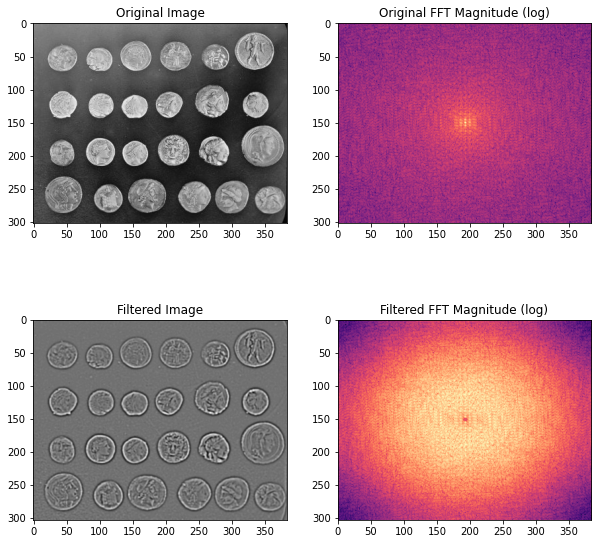

In [9]:
from skimage.data import camera, coins

image = coins()

wimage = image * window('hann', image.shape)  # window image to improve FFT
filtered_image = difference_of_gaussians(image, 1)
filtered_wimage = filtered_image * window('hann', image.shape)
im_f_mag = fftshift(np.abs(fftn(wimage)))
fim_f_mag = fftshift(np.abs(fftn(filtered_wimage)))

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title('Original Image')
ax[0, 1].imshow(np.log(im_f_mag), cmap='magma')
ax[0, 1].set_title('Original FFT Magnitude (log)')
ax[1, 0].imshow(filtered_image, cmap='gray')
ax[1, 0].set_title('Filtered Image')
ax[1, 1].imshow(np.log(fim_f_mag), cmap='magma')
ax[1, 1].set_title('Filtered FFT Magnitude (log)')
plt.show()